Before we begin working with our project we need to load in some libraries. In this example we will be working was lasio, pandas and os. The os library will allow us to search a directory on our computer and check what files are contained within it.

In [1]:
import lasio
import pandas as pd
import os

Next we are going setup an empty list which will hold all of our las file names. It may be the case that the folder we are working with contains multiple different file types, so we want to only isolate the `.las` files.

Secondly, in this example we have our files stored within a sub folder called Data/15/LASFiles/. This will change depending on where your files are stored.

In [2]:
# Read the Files

las_file_list = []
path = 'LASFiles/'

We can now use the `os.listdir` method and pass in the file path. When we run this we will be able to see a list of all the files in the folder.

In [3]:
# View contents of the path, we will see LAS files plus an ASCII file
files = os.listdir(path)
files

FileNotFoundError: [Errno 2] No such file or directory: 'LASFiles/'

## Reading the LAS Files

As you can see, we have returned 4 LAS files and 1 ASC file. As we are only interested in the LAS files we need to loop through each file and check if the extension is .las. To catch any cases where the extension is .LAS instead of .las, we need to call upon `.lower()` to convert the file string to lowercase characters.  
  
Once we have identified if the file ends with .las, we can then add the path ('LASFiles/') to the file name. This is required for lasio to pick up the files correctly. If we only pass the file name, it would fail to find the file in the main folder.

In [154]:
for file in files:
    if file.lower().endswith('.las'):
        las_file_list.append(path + file)
        
las_file_list

['LASFiles/L0506_comp.las',
 'LASFiles/L0507_comp.las',
 'LASFiles/L0509_comp.las',
 'LASFiles/L05B03_comp.las']

### Reading the LAS Files to a Dataframe

Next we will setup a blank list called `df_list`. To this list we are going to append a pandas dataframe of the well data to it. This will allow us to join them together in the next step.
  
    
In order to know where the data originated from we need to add a column called well to the dataframe using `lasdf['WELL'] = las.well.WELL.value`. When we do this we are creating a single column with a single value. Doing this will allow us to easily group the data and visualise it.

Additionally, as lasio sets the dataframe index to the depth value from the file, we can create an additional column called `DEPTH`.

In [155]:
df_list = []

for lasfile in las_file_list:
    las = lasio.read(lasfile)
    lasdf = las.df()
    
    lasdf['WELL'] = las.well.WELL.value
    lasdf['DEPTH'] = lasdf.index
    df_list.append(lasdf)


In [156]:
workingdf = pd.concat(df_list, sort=True)

In [157]:
workingdf.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 188873 entries, 96.2 to 76.0999
Data columns (total 7 columns):
DEPTH    188873 non-null float64
DRHO     36913 non-null float64
DT       113630 non-null float64
GR       188462 non-null float64
NPHI     48595 non-null float64
RHOB     36913 non-null float64
WELL     188873 non-null object
dtypes: float64(6), object(1)
memory usage: 11.5+ MB


In [158]:
workingdf['WELL'].unique()

array(['L05-06', 'L05-07', 'L05-B-01', 'L05-B-03'], dtype=object)

In [159]:
grouped = workingdf.groupby('WELL')

In [184]:
ncols = 2
nrows = int(len(workingdf['WELL'].unique()) / ncols)

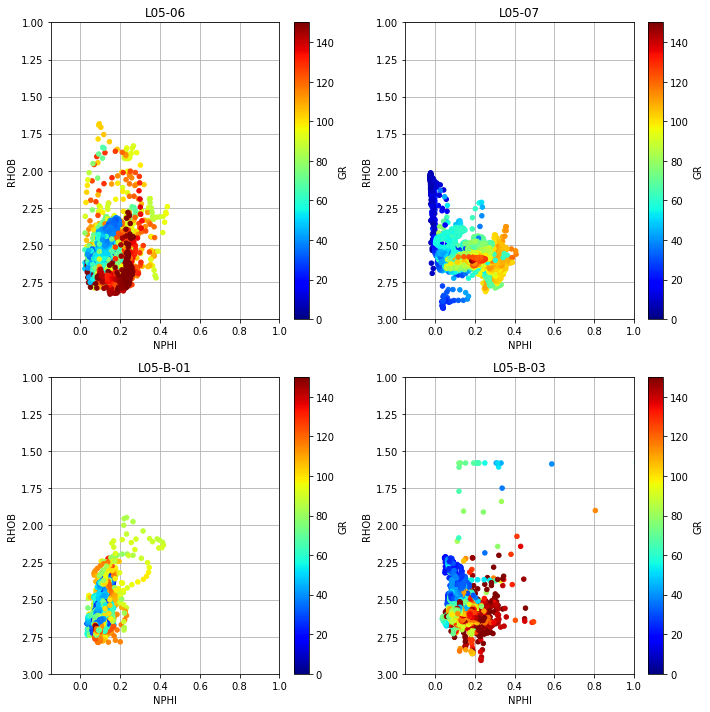

In [186]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows, ncols, figsize=(10,10))

for (name, df), ax in zip(grouped, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='GR', cmap='jet', vmin=0, vmax=150)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
    ax.grid(True)
    ax.set_axisbelow(True)
plt.tight_layout()

In [168]:
import seaborn as sns

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\base.py:2897: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


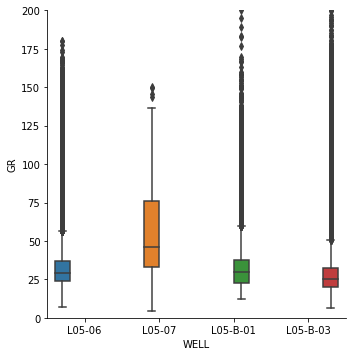

In [169]:
g = sns.catplot(x='WELL', y='GR', hue='WELL', data=workingdf, kind='box')
g.set(ylim=(0, 200))

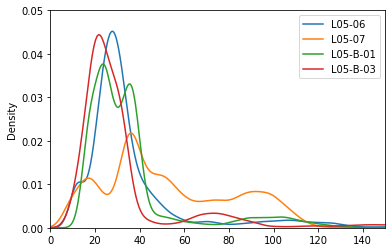

In [170]:
workingdf.groupby('WELL').GR.plot(kind='kde')
plt.xlim(0,150)
plt.ylim(0, 0.05) #ylim upper may change depending on data
plt.legend()